In [1]:
import tensorflow as tf
import cv2
import streamlit as st
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
import pandas as pd
import numpy as np

print("Libraries imported successfully!")
print(f"TensorFlow version: {tf.__version__}")
print(f"OpenCV version: {cv2.__version__}")
# Note: Streamlit doesn't typically print a version like this in a notebook cell

c:\Python 3-12-0\Lib\site-packages\google\protobuf\runtime_version.py:98: UserWarning: Protobuf gencode version 5.28.3 is exactly one major version older than the runtime version 6.31.1 at tensorflow/core/framework/attr_value.proto. Please update the gencode to avoid compatibility violations in the next runtime release.
  warnings.warn(
c:\Python 3-12-0\Lib\site-packages\google\protobuf\runtime_version.py:98: UserWarning: Protobuf gencode version 5.28.3 is exactly one major version older than the runtime version 6.31.1 at tensorflow/core/framework/tensor.proto. Please update the gencode to avoid compatibility violations in the next runtime release.
  warnings.warn(
c:\Python 3-12-0\Lib\site-packages\google\protobuf\runtime_version.py:98: UserWarning: Protobuf gencode version 5.28.3 is exactly one major version older than the runtime version 6.31.1 at tensorflow/core/framework/resource_handle.proto. Please update the gencode to avoid compatibility violations in the next runtime release.

Libraries imported successfully!
TensorFlow version: 2.20.0
OpenCV version: 4.12.0


In [2]:
import os
import cv2
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Optional: Set style for seaborn plots
sns.set_style("whitegrid")

In [3]:
# Define the base path to the dataset within your project's data folder
# Replace 'tuberculosis-chest-xrays-images' with the *exact* name of your unzipped dataset folder inside 'data'
DATA_DIR = os.path.join('..', 'data', 'tuberculosis-chest-xrays-images') # Adjust name if necessary

# Check if the path exists
if os.path.exists(DATA_DIR):
    print(f"Dataset path found: {DATA_DIR}")
else:
    print(f"Dataset path NOT found: {DATA_DIR}")
    print("Please check the path and the name of your dataset folder inside the 'data' directory.")
    # List contents of the parent 'data' directory to help debug
    parent_data_dir = os.path.join('..', 'data')
    if os.path.exists(parent_data_dir):
        print(f"Contents of '{parent_data_dir}': {os.listdir(parent_data_dir)}")
    else:
        print(f"Parent data directory '{parent_data_dir}' does not exist.")

# Define paths to the Normal and Tuberculosis subdirectories
NORMAL_DIR = os.path.join(DATA_DIR, 'Normal')
TB_DIR = os.path.join(DATA_DIR, 'Tuberculosis') # Or 'TB', check your folder name

print(f"Normal images path: {NORMAL_DIR}")
print(f"Tuberculosis images path: {TB_DIR}")

Dataset path found: ..\data\tuberculosis-chest-xrays-images
Normal images path: ..\data\tuberculosis-chest-xrays-images\Normal
Tuberculosis images path: ..\data\tuberculosis-chest-xrays-images\Tuberculosis


In [4]:
# Count the number of images in each class
normal_count = len(os.listdir(NORMAL_DIR))
tb_count = len(os.listdir(TB_DIR))
total_count = normal_count + tb_count

print(f"Number of Normal images: {normal_count}")
print(f"Number of Tuberculosis images: {tb_count}")
print(f"Total number of images: {total_count}")

# Check for any potential issues (e.g., non-image files)
print("\nSample filenames in Normal folder (first 5):", os.listdir(NORMAL_DIR)[:5])
print("Sample filenames in Tuberculosis folder (first 5):", os.listdir(TB_DIR)[:5])

Number of Normal images: 514
Number of Tuberculosis images: 2494
Total number of images: 3008

Sample filenames in Normal folder (first 5): ['others (1).jpg', 'others (10).jpg', 'others (100).jpg', 'others (101).jpg', 'others (102).jpg']
Sample filenames in Tuberculosis folder (first 5): ['TB.1.jpg', 'TB.10.jpg', 'TB.100.jpg', 'TB.1000.jpg', 'TB.1001.jpg']


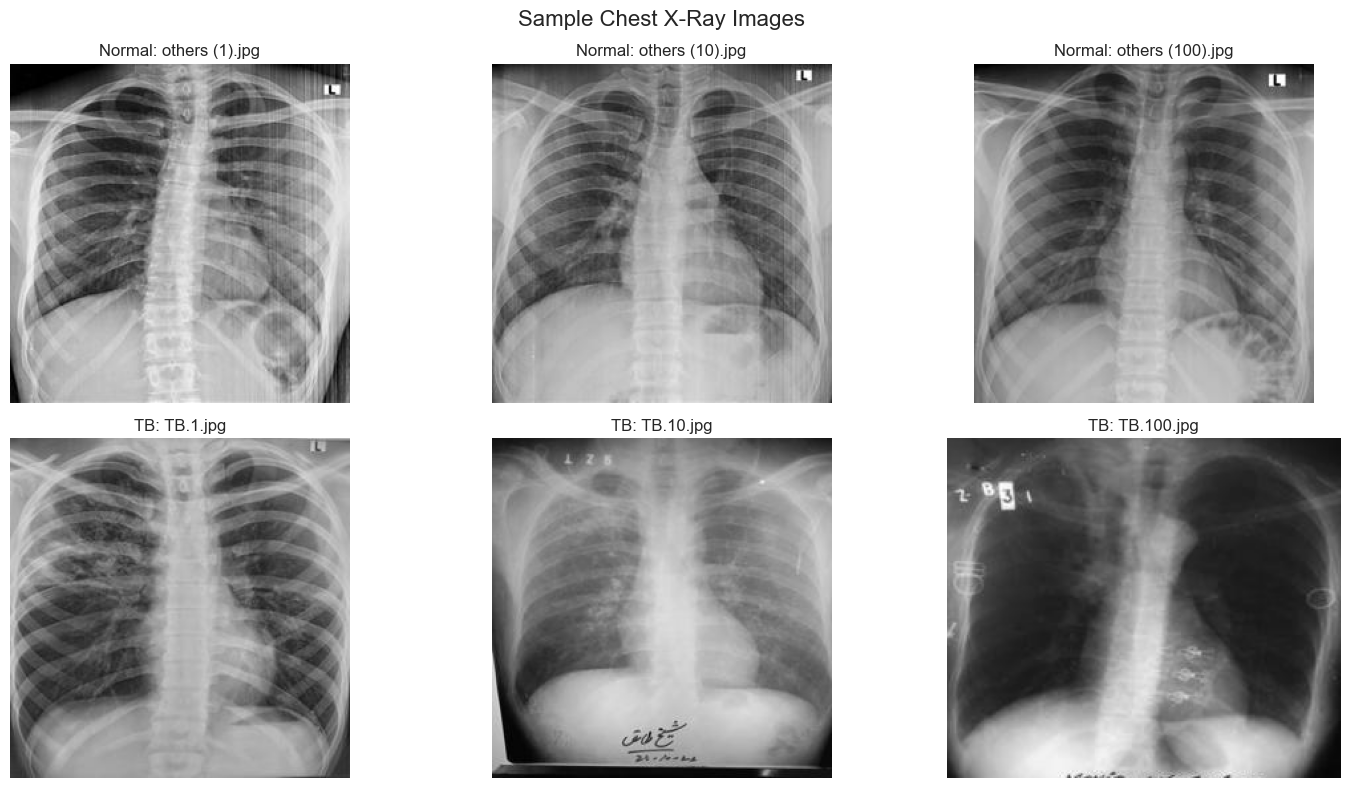

In [5]:
# Function to load and display sample images
def display_sample_images(normal_dir, tb_dir, num_samples=3):
    fig, axes = plt.subplots(2, num_samples, figsize=(15, 8))
    fig.suptitle('Sample Chest X-Ray Images', fontsize=16)

    # Load and display Normal images
    normal_images = os.listdir(normal_dir)[:num_samples]
    for i, img_name in enumerate(normal_images):
        img_path = os.path.join(normal_dir, img_name)
        # Read image using OpenCV (loads as BGR)
        img_bgr = cv2.imread(img_path)
        # Convert BGR to RGB for matplotlib
        img_rgb = cv2.cvtColor(img_bgr, cv2.COLOR_BGR2RGB)
        axes[0, i].imshow(img_rgb, cmap='gray') # Use cmap='gray' for X-rays if desired, or remove it for color
        axes[0, i].set_title(f'Normal: {img_name}')
        axes[0, i].axis('off')

    # Load and display Tuberculosis images
    tb_images = os.listdir(tb_dir)[:num_samples]
    for i, img_name in enumerate(tb_images):
        img_path = os.path.join(tb_dir, img_name)
        img_bgr = cv2.imread(img_path)
        img_rgb = cv2.cvtColor(img_bgr, cv2.COLOR_BGR2RGB)
        axes[1, i].imshow(img_rgb, cmap='gray') # Use cmap='gray' for X-rays if desired
        axes[1, i].set_title(f'TB: {img_name}')
        axes[1, i].axis('off')

    plt.tight_layout()
    plt.show()

# Call the function to display samples
display_sample_images(NORMAL_DIR, TB_DIR)

#### EDA - Analyzing Image Dimensions and Pixel Values


=== Image Dimensions Analysis ===
Normal Images - Min Width: 256, Max Width: 256
Normal Images - Min Height: 256, Max Height: 256
Normal Images - Mean Width: 256.00, Std Width: 0.00
Normal Images - Mean Height: 256.00, Std Height: 0.00

TB Images - Min Width: 234, Max Width: 256
TB Images - Min Height: 185, Max Height: 256
TB Images - Mean Width: 255.97, Std Width: 0.54
TB Images - Mean Height: 253.92, Std Height: 9.37

Unique dimensions in Normal images: 1
Unique dimensions in TB images: 60


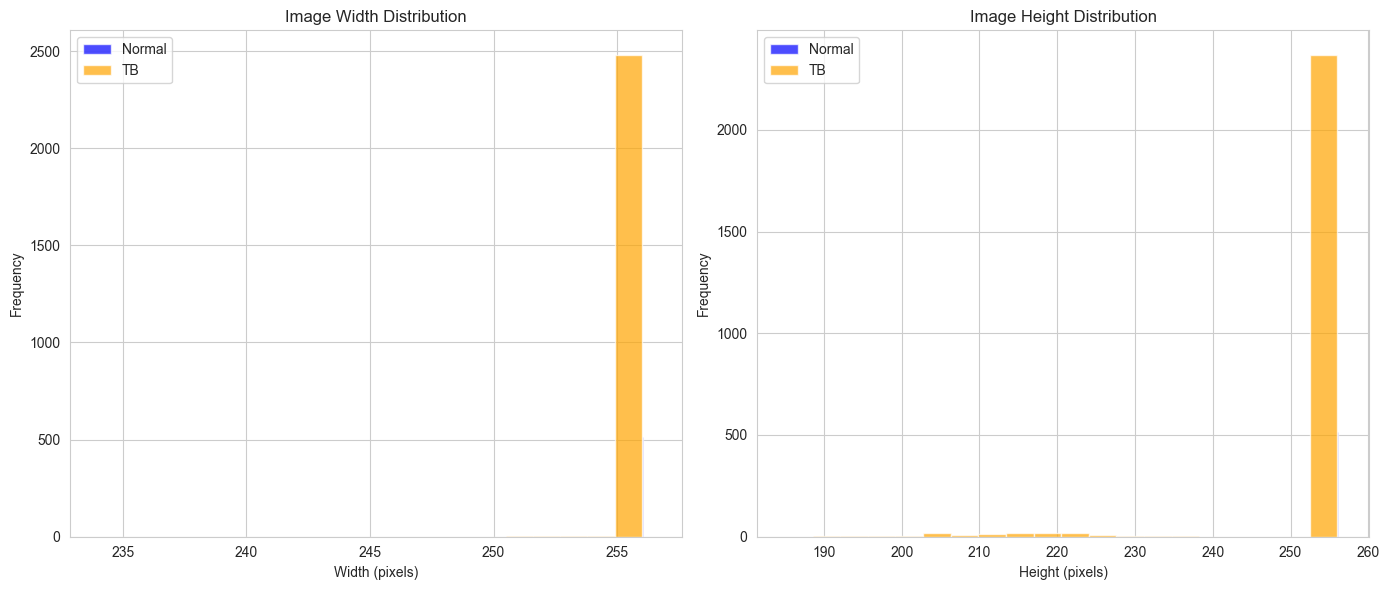

In [6]:
# Function to get image dimensions
def get_image_dimensions(image_dir):
    dimensions = []
    for img_name in os.listdir(image_dir):
        img_path = os.path.join(image_dir, img_name)
        img = cv2.imread(img_path)
        if img is not None:
            h, w, c = img.shape
            dimensions.append((w, h)) # Width, Height
        else:
            print(f"Warning: Could not read image {img_name}")
    return dimensions

# Get dimensions for Normal and TB images
normal_dims = get_image_dimensions(NORMAL_DIR)
tb_dims = get_image_dimensions(TB_DIR)

# Convert to numpy arrays for easier analysis
normal_dims_np = np.array(normal_dims)
tb_dims_np = np.array(tb_dims)

# Calculate statistics for dimensions
print("=== Image Dimensions Analysis ===")
print(f"Normal Images - Min Width: {np.min(normal_dims_np[:, 0])}, Max Width: {np.max(normal_dims_np[:, 0])}")
print(f"Normal Images - Min Height: {np.min(normal_dims_np[:, 1])}, Max Height: {np.max(normal_dims_np[:, 1])}")
print(f"Normal Images - Mean Width: {np.mean(normal_dims_np[:, 0]):.2f}, Std Width: {np.std(normal_dims_np[:, 0]):.2f}")
print(f"Normal Images - Mean Height: {np.mean(normal_dims_np[:, 1]):.2f}, Std Height: {np.std(normal_dims_np[:, 1]):.2f}")

print(f"\nTB Images - Min Width: {np.min(tb_dims_np[:, 0])}, Max Width: {np.max(tb_dims_np[:, 0])}")
print(f"TB Images - Min Height: {np.min(tb_dims_np[:, 1])}, Max Height: {np.max(tb_dims_np[:, 1])}")
print(f"TB Images - Mean Width: {np.mean(tb_dims_np[:, 0]):.2f}, Std Width: {np.std(tb_dims_np[:, 0]):.2f}")
print(f"TB Images - Mean Height: {np.mean(tb_dims_np[:, 1]):.2f}, Std Height: {np.std(tb_dims_np[:, 1]):.2f}")

# Check if all images have the same dimensions
unique_normal_dims = set(normal_dims)
unique_tb_dims = set(tb_dims)

print(f"\nUnique dimensions in Normal images: {len(unique_normal_dims)}")
print(f"Unique dimensions in TB images: {len(unique_tb_dims)}")

# Optional: Plot histogram of widths and heights for both classes
plt.figure(figsize=(14, 6))

plt.subplot(1, 2, 1)
plt.hist(normal_dims_np[:, 0], bins=20, alpha=0.7, label='Normal', color='blue')
plt.hist(tb_dims_np[:, 0], bins=20, alpha=0.7, label='TB', color='orange')
plt.title('Image Width Distribution')
plt.xlabel('Width (pixels)')
plt.ylabel('Frequency')
plt.legend()

plt.subplot(1, 2, 2)
plt.hist(normal_dims_np[:, 1], bins=20, alpha=0.7, label='Normal', color='blue')
plt.hist(tb_dims_np[:, 1], bins=20, alpha=0.7, label='TB', color='orange')
plt.title('Image Height Distribution')
plt.xlabel('Height (pixels)')
plt.ylabel('Frequency')
plt.legend()

plt.tight_layout()
plt.show()

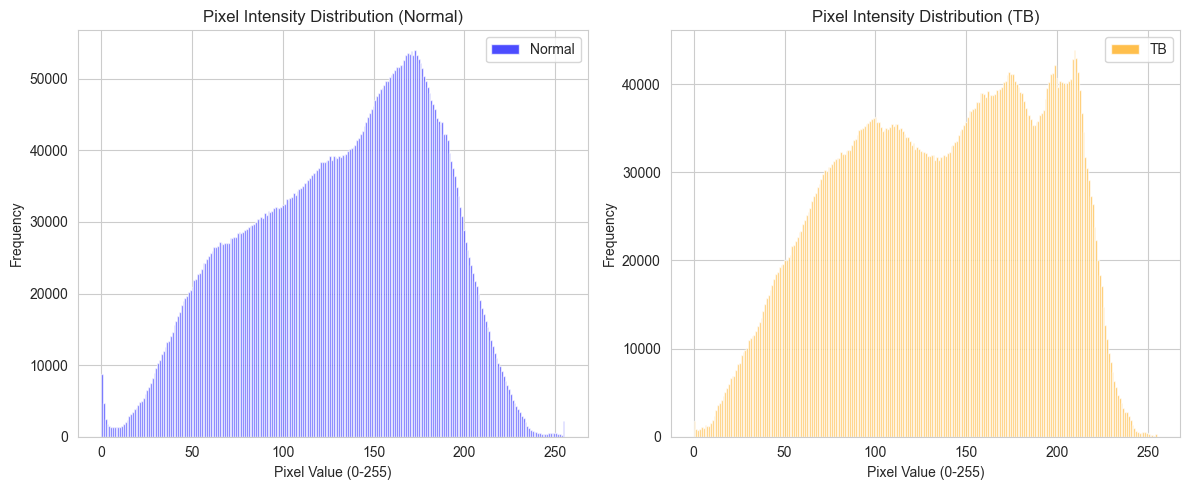

=== Pixel Intensity Statistics (Sampled Images) ===
Normal Images - Mean Intensity: 132.55, Std Dev: 50.52
Normal Images - Min Intensity: 0, Max Intensity: 255

TB Images - Mean Intensity: 136.03, Std Dev: 55.30
TB Images - Min Intensity: 0, Max Intensity: 255


In [7]:
# Function to get pixel intensity values (flattened array)
def get_pixel_intensities(image_dir, num_samples=100):
    intensities = []
    img_files = os.listdir(image_dir)
    # Sample a subset of images for faster computation
    sampled_files = img_files[:min(num_samples, len(img_files))]
    for img_name in sampled_files:
        img_path = os.path.join(image_dir, img_name)
        img = cv2.imread(img_path)
        if img is not None:
            # Convert to grayscale if needed (X-rays are usually grayscale, but sometimes stored as BGR)
            if len(img.shape) == 3:
                img_gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
            else:
                img_gray = img
            # Flatten the image array and add to list
            intensities.extend(img_gray.flatten())
        else:
            print(f"Warning: Could not read image {img_name} for pixel analysis")
    return np.array(intensities)

# Get pixel intensities for Normal and TB images (sample 100 images each for speed)
normal_pixels = get_pixel_intensities(NORMAL_DIR, num_samples=100)
tb_pixels = get_pixel_intensities(TB_DIR, num_samples=100)

# Plot histograms of pixel intensities
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.hist(normal_pixels, bins=256, range=(0, 255), alpha=0.7, label='Normal', color='blue')
plt.title('Pixel Intensity Distribution (Normal)')
plt.xlabel('Pixel Value (0-255)')
plt.ylabel('Frequency')
plt.legend()

plt.subplot(1, 2, 2)
plt.hist(tb_pixels, bins=256, range=(0, 255), alpha=0.7, label='TB', color='orange')
plt.title('Pixel Intensity Distribution (TB)')
plt.xlabel('Pixel Value (0-255)')
plt.ylabel('Frequency')
plt.legend()

plt.tight_layout()
plt.show()

# Print basic statistics for pixel intensities
print("=== Pixel Intensity Statistics (Sampled Images) ===")
print(f"Normal Images - Mean Intensity: {np.mean(normal_pixels):.2f}, Std Dev: {np.std(normal_pixels):.2f}")
print(f"Normal Images - Min Intensity: {np.min(normal_pixels)}, Max Intensity: {np.max(normal_pixels)}")

print(f"\nTB Images - Mean Intensity: {np.mean(tb_pixels):.2f}, Std Dev: {np.std(tb_pixels):.2f}")
print(f"TB Images - Min Intensity: {np.min(tb_pixels)}, Max Intensity: {np.max(tb_pixels)}")

### Data Preprocessing and Splitting the Dataset

In [8]:
# Import necessary functions from TensorFlow/Keras for data loading and splitting
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from sklearn.model_selection import train_test_split
import os
import numpy as np
import pandas as pd # Although we might not use it directly here, it's good to have loaded

In [9]:
# Define image size and batch size
IMG_HEIGHT = 256
IMG_WIDTH = 256
BATCH_SIZE = 32 # You can adjust this based on your memory constraints
SEED = 42 # For reproducible shuffling

In [10]:
# Create an ImageDataGenerator instance for preprocessing
# It will rescale pixel values to [0, 1] (divide by 255)
datagen = ImageDataGenerator(
    rescale=1./255,
    # Optional: Add data augmentation here later if desired
    # rotation_range=20,
    # width_shift_range=0.2,
    # height_shift_range=0.2,
    # horizontal_flip=True,
    # validation_split=0.2 # We'll handle splitting manually first
)

In [11]:
# Load the entire dataset using flow_from_directory
# Note: We temporarily use a validation split here just to initiate the flow, but we'll re-split manually later
# Alternatively, load without any split initially and manage splits manually using labels and paths

# Let's load the data without an initial split from the main data directory
# First, get the full paths and labels manually
data_dir = os.path.join('..', 'data', 'tuberculosis-chest-xrays-images') # Adjust if necessary

# Prepare lists for image paths and labels
image_paths = []
labels = []

# Iterate through Normal and Tuberculosis folders
for class_name in ['Normal', 'Tuberculosis']: # Adjust folder names if necessary
    class_path = os.path.join(data_dir, class_name)
    for img_name in os.listdir(class_path):
        img_path = os.path.join(class_path, img_name)
        image_paths.append(img_path)
        labels.append(1 if class_name == 'Tuberculosis' else 0) # 1 for TB, 0 for Normal

# Convert to numpy arrays
image_paths = np.array(image_paths)
labels = np.array(labels)

print(f"Total images loaded: {len(image_paths)}")
print(f"Labels shape: {labels.shape}")
print(f"Unique labels and counts: {np.unique(labels, return_counts=True)}")

Total images loaded: 3008
Labels shape: (3008,)
Unique labels and counts: (array([0, 1]), array([ 514, 2494]))


In [12]:
# Split the data into train+validation and test sets (e.g., 80% train+val, 20% test)
# Use stratify=labels to maintain class distribution
train_val_paths, test_paths, train_val_labels, test_labels = train_test_split(
    image_paths, labels, test_size=0.2, random_state=SEED, stratify=labels
)

# Now, split the train+validation set into train and validation sets (e.g., 75% of 80% = 60% train, 25% of 80% = 20% val)
# 75% of the remaining 80% is 0.75 * 0.8 = 0.6 (60% of total), 25% of 80% is 0.25 * 0.8 = 0.2 (20% of total)
# Or simply: split train_val into 75% train, 25% val
train_paths, val_paths, train_labels, val_labels = train_test_split(
    train_val_paths, train_val_labels, test_size=0.25, random_state=SEED, stratify=train_val_labels # 0.25 * 0.8 = 0.2 for val
)

print(f"Training samples: {len(train_paths)}")
print(f"Validation samples: {len(val_paths)}")
print(f"Test samples: {len(test_paths)}")
print(f"Training label distribution: {dict(zip(*np.unique(train_labels, return_counts=True)))}")
print(f"Validation label distribution: {dict(zip(*np.unique(val_labels, return_counts=True)))}")
print(f"Test label distribution: {dict(zip(*np.unique(test_labels, return_counts=True)))}")

Training samples: 1804
Validation samples: 602
Test samples: 602
Training label distribution: {np.int64(0): np.int64(308), np.int64(1): np.int64(1496)}
Validation label distribution: {np.int64(0): np.int64(103), np.int64(1): np.int64(499)}
Test label distribution: {np.int64(0): np.int64(103), np.int64(1): np.int64(499)}


In [13]:
# Function to load and preprocess a single image
def load_and_preprocess_image(path, label):
    image = tf.io.read_file(path)
    image = tf.image.decode_image(image, channels=3) # Assuming RGB, X-rays might be grayscale but often stored as 3-channel
    image = tf.image.resize(image, [IMG_HEIGHT, IMG_WIDTH])
    image = tf.cast(image, tf.float32) / 255.0 # Normalize to [0, 1]
    return image, label

# Create tf.data.Dataset from the split paths and labels
train_dataset = tf.data.Dataset.from_tensor_slices((train_paths, train_labels))
val_dataset = tf.data.Dataset.from_tensor_slices((val_paths, val_labels))
test_dataset = tf.data.Dataset.from_tensor_slices((test_paths, test_labels))

# Apply the preprocessing function
train_dataset = train_dataset.map(load_and_preprocess_image, num_parallel_calls=tf.data.AUTOTUNE)
val_dataset = val_dataset.map(load_and_preprocess_image, num_parallel_calls=tf.data.AUTOTUNE)
test_dataset = test_dataset.map(load_and_preprocess_image, num_parallel_calls=tf.data.AUTOTUNE)

# Set batch size and configure for performance (optional but recommended)
train_dataset = train_dataset.batch(BATCH_SIZE).prefetch(buffer_size=tf.data.AUTOTUNE)
val_dataset = val_dataset.batch(BATCH_SIZE).prefetch(buffer_size=tf.data.AUTOTUNE)
test_dataset = test_dataset.batch(BATCH_SIZE).prefetch(buffer_size=tf.data.AUTOTUNE)

print("Datasets created successfully!")
print(f"Train dataset element spec: {train_dataset.element_spec}")
print(f"Validation dataset element spec: {val_dataset.element_spec}")
print(f"Test dataset element spec: {test_dataset.element_spec}")

ValueError: in user code:

    File "C:\Users\absah\AppData\Local\Temp\ipykernel_23248\658430352.py", line 5, in load_and_preprocess_image  *
        image = tf.image.resize(image, [IMG_HEIGHT, IMG_WIDTH])

    ValueError: 'images' contains no shape.


In [14]:
# Revised function to load and preprocess a single image
def load_and_preprocess_image(path, label):
    # Read the raw image file
    image = tf.io.read_file(path)
    # Decode the image, specifying 1 channel for grayscale (X-rays are typically grayscale)
    # If you encounter issues, you can try channels=3 first, then convert to grayscale if needed
    image = tf.image.decode_image(image, channels=1, expand_animations=False) # Try channels=1 for grayscale
    # Check if decode_image returned a valid image
    if image is None:
        raise ValueError(f"Failed to decode image at path: {path}")
    # Ensure the image has the correct rank (should be 3: [height, width, channels])
    image = tf.ensure_shape(image, [None, None, 1]) # This helps TensorFlow understand the shape
    # Resize the image to the target dimensions
    image = tf.image.resize(image, [IMG_HEIGHT, IMG_WIDTH])
    # Convert to float32 and normalize to [0, 1]
    image = tf.cast(image, tf.float32) / 255.0
    return image, label

In [15]:
# Alternative function: Load as 3-channel, then optionally convert to grayscale
def load_and_preprocess_image_alt(path, label):
    image = tf.io.read_file(path)
    image = tf.image.decode_image(image, channels=3, expand_animations=False) # Load as 3-channel
    if image is None:
        raise ValueError(f"Failed to decode image at path: {path}")
    image = tf.ensure_shape(image, [None, None, 3])
    image = tf.image.resize(image, [IMG_HEIGHT, IMG_WIDTH])
    image = tf.cast(image, tf.float32) / 255.0
    # Optional: Convert to grayscale if desired (for consistency, but not always necessary for CNNs)
    # image = tf.image.rgb_to_grayscale(image)
    return image, label

In [18]:
# Define a Python function to load and preprocess image using OpenCV
def load_and_preprocess_image_cv2(path_str, label):
    # Convert path from tensor to string
    path = path_str.numpy().decode('utf-8') # Decode bytes to string
    # Load image using OpenCV (loads as BGR)
    img_bgr = cv2.imread(path)
    if img_bgr is None:
        raise ValueError(f"Failed to read image at path: {path}")
    # Convert BGR to RGB (optional, but often done for consistency with matplotlib)
    # img_rgb = cv2.cvtColor(img_bgr, cv2.COLOR_BGR2RGB)
    # For grayscale X-rays, we can convert to grayscale or keep as BGR/RGB
    # Let's convert to grayscale for simplicity and consistency with typical X-ray processing
    img_gray = cv2.cvtColor(img_bgr, cv2.COLOR_BGR2GRAY)
    # Resize to target dimensions
    img_resized = cv2.resize(img_gray, (IMG_WIDTH, IMG_HEIGHT))
    # Normalize pixel values to [0, 1]
    img_normalized = img_resized.astype(np.float32) / 255.0
    # Add channel dimension (for CNN input, shape should be [height, width, channels])
    img_final = np.expand_dims(img_normalized, axis=-1) # Shape becomes (256, 256, 1)
    return img_final, label

# Wrap the Python function in a TensorFlow-compatible function using tf.py_function
def tf_load_and_preprocess_image(path, label):
    # Use tf.py_function to call the Python function
    # Note: tf.py_function returns tensors, so we need to specify output shapes and types
    image, label_out = tf.py_function(
        func=load_and_preprocess_image_cv2,
        inp=[path, label],
        Tout=[tf.float32, tf.int32] # Output types: float32 for image, int32 for label
    )
    # Set the shape of the output tensors explicitly
    image.set_shape([IMG_HEIGHT, IMG_WIDTH, 1]) # Set shape for the image tensor
    label_out.set_shape([]) # Set shape for the scalar label tensor
    return image, label_out

In [19]:
# Create tf.data.Dataset from the split paths and labels
train_dataset = tf.data.Dataset.from_tensor_slices((train_paths, train_labels))
val_dataset = tf.data.Dataset.from_tensor_slices((val_paths, val_labels))
test_dataset = tf.data.Dataset.from_tensor_slices((test_paths, test_labels))

# Apply the preprocessing function using tf.py_function wrapper
train_dataset = train_dataset.map(tf_load_and_preprocess_image, num_parallel_calls=tf.data.AUTOTUNE)
val_dataset = val_dataset.map(tf_load_and_preprocess_image, num_parallel_calls=tf.data.AUTOTUNE)
test_dataset = test_dataset.map(tf_load_and_preprocess_image, num_parallel_calls=tf.data.AUTOTUNE)

# Set batch size and configure for performance (optional but recommended)
train_dataset = train_dataset.batch(BATCH_SIZE).prefetch(buffer_size=tf.data.AUTOTUNE)
val_dataset = val_dataset.batch(BATCH_SIZE).prefetch(buffer_size=tf.data.AUTOTUNE)
test_dataset = test_dataset.batch(BATCH_SIZE).prefetch(buffer_size=tf.data.AUTOTUNE)

print("Datasets created successfully!")
print(f"Train dataset element spec: {train_dataset.element_spec}")
print(f"Validation dataset element spec: {val_dataset.element_spec}")
print(f"Test dataset element spec: {test_dataset.element_spec}")

# Optional: Print a batch of images and labels to verify
print("\nSample batch from training dataset:")
for images, labels in train_dataset.take(1):
    print(f"Batch image shape: {images.shape}")
    print(f"Batch label shape: {labels.shape}")
    print(f"Sample labels in batch: {labels[:5].numpy()}") # Print first 5 labels
    break # Only take one batch

Datasets created successfully!
Train dataset element spec: (TensorSpec(shape=(None, 256, 256, 1), dtype=tf.float32, name=None), TensorSpec(shape=(None,), dtype=tf.int32, name=None))
Validation dataset element spec: (TensorSpec(shape=(None, 256, 256, 1), dtype=tf.float32, name=None), TensorSpec(shape=(None,), dtype=tf.int32, name=None))
Test dataset element spec: (TensorSpec(shape=(None, 256, 256, 1), dtype=tf.float32, name=None), TensorSpec(shape=(None,), dtype=tf.int32, name=None))

Sample batch from training dataset:


InvalidArgumentError: {{function_node __wrapped__IteratorGetNext_output_types_2_device_/job:localhost/replica:0/task:0/device:CPU:0}} ValueError: Tensor conversion requested dtype int32 for Tensor with dtype int64: <tf.Tensor: shape=(), dtype=int64, numpy=1>
Traceback (most recent call last):

  File "c:\Python 3-12-0\Lib\site-packages\tensorflow\python\ops\script_ops.py", line 267, in __call__
    return func(device, token, args)
           ^^^^^^^^^^^^^^^^^^^^^^^^^

  File "c:\Python 3-12-0\Lib\site-packages\tensorflow\python\ops\script_ops.py", line 145, in __call__
    outputs = self._call(device, args)
              ^^^^^^^^^^^^^^^^^^^^^^^^

  File "c:\Python 3-12-0\Lib\site-packages\tensorflow\python\ops\script_ops.py", line 162, in _call
    _maybe_copy_to_context_device(self._convert(x, dtype=dtype),
                                  ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^

  File "c:\Python 3-12-0\Lib\site-packages\tensorflow\python\ops\script_ops.py", line 129, in _convert
    return ops.convert_to_tensor(value, dtype=dtype)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^

  File "c:\Python 3-12-0\Lib\site-packages\tensorflow\python\profiler\trace.py", line 183, in wrapped
    return func(*args, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^

  File "c:\Python 3-12-0\Lib\site-packages\tensorflow\python\framework\ops.py", line 757, in convert_to_tensor
    return tensor_conversion_registry.convert(
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^

  File "c:\Python 3-12-0\Lib\site-packages\tensorflow\python\framework\tensor_conversion_registry.py", line 209, in convert
    return overload(dtype, name)  #  pylint: disable=not-callable
           ^^^^^^^^^^^^^^^^^^^^^

  File "c:\Python 3-12-0\Lib\site-packages\tensorflow\python\framework\ops.py", line 652, in __tf_tensor__
    return super().__tf_tensor__(dtype, name)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^

  File "c:\Python 3-12-0\Lib\site-packages\tensorflow\python\framework\tensor.py", line 760, in __tf_tensor__
    raise ValueError(

ValueError: Tensor conversion requested dtype int32 for Tensor with dtype int64: <tf.Tensor: shape=(), dtype=int64, numpy=1>


	 [[{{node EagerPyFunc}}]] [Op:IteratorGetNext] name: 

In [20]:
# Define a Python function to load and preprocess image using OpenCV
# Fixes the label dtype issue
def load_and_preprocess_image_cv2_fixed(path_str, label):
    # Convert path from tensor to string
    path = path_str.numpy().decode('utf-8') # Decode bytes to string
    # Load image using OpenCV (loads as BGR)
    img_bgr = cv2.imread(path)
    if img_bgr is None:
        raise ValueError(f"Failed to read image at path: {path}")
    # Convert BGR to RGB (optional, but often done for consistency with matplotlib)
    # img_rgb = cv2.cvtColor(img_bgr, cv2.COLOR_BGR2RGB)
    # For grayscale X-rays, we can convert to grayscale or keep as BGR/RGB
    # Let's convert to grayscale for simplicity and consistency with typical X-ray processing
    img_gray = cv2.cvtColor(img_bgr, cv2.COLOR_BGR2GRAY)
    # Resize to target dimensions
    img_resized = cv2.resize(img_gray, (IMG_WIDTH, IMG_HEIGHT))
    # Normalize pixel values to [0, 1]
    img_normalized = img_resized.astype(np.float32) / 255.0
    # Add channel dimension (for CNN input, shape should be [height, width, channels])
    img_final = np.expand_dims(img_normalized, axis=-1) # Shape becomes (256, 256, 1)

    # *** CRUCIAL FIX: Cast the label to numpy.int32 ***
    label_out = np.array(label.numpy(), dtype=np.int32)

    return img_final, label_out

# Wrap the FIXED Python function in a TensorFlow-compatible function using tf.py_function
def tf_load_and_preprocess_image_fixed(path, label):
    # Use tf.py_function to call the Python function
    # Note: tf.py_function returns tensors, so we need to specify output shapes and types
    image, label_out = tf.py_function(
        func=load_and_preprocess_image_cv2_fixed,
        inp=[path, label],
        Tout=[tf.float32, tf.int32] # Output types: float32 for image, int32 for label
    )
    # Set the shape of the output tensors explicitly
    image.set_shape([IMG_HEIGHT, IMG_WIDTH, 1]) # Set shape for the image tensor
    label_out.set_shape([]) # Set shape for the scalar label tensor
    return image, label_out

In [21]:
# Create tf.data.Dataset from the split paths and labels
train_dataset = tf.data.Dataset.from_tensor_slices((train_paths, train_labels))
val_dataset = tf.data.Dataset.from_tensor_slices((val_paths, val_labels))
test_dataset = tf.data.Dataset.from_tensor_slices((test_paths, test_labels))

# Apply the FIXED preprocessing function using tf.py_function wrapper
train_dataset = train_dataset.map(tf_load_and_preprocess_image_fixed, num_parallel_calls=tf.data.AUTOTUNE)
val_dataset = val_dataset.map(tf_load_and_preprocess_image_fixed, num_parallel_calls=tf.data.AUTOTUNE)
test_dataset = test_dataset.map(tf_load_and_preprocess_image_fixed, num_parallel_calls=tf.data.AUTOTUNE)

# Set batch size and configure for performance (optional but recommended)
train_dataset = train_dataset.batch(BATCH_SIZE).prefetch(buffer_size=tf.data.AUTOTUNE)
val_dataset = val_dataset.batch(BATCH_SIZE).prefetch(buffer_size=tf.data.AUTOTUNE)
test_dataset = test_dataset.batch(BATCH_SIZE).prefetch(buffer_size=tf.data.AUTOTUNE)

print("Datasets created successfully (with fixed label dtypes)!")
print(f"Train dataset element spec: {train_dataset.element_spec}")
print(f"Validation dataset element spec: {val_dataset.element_spec}")
print(f"Test dataset element spec: {test_dataset.element_spec}")

# Optional: Print a batch of images and labels to verify (this should now work)
print("\nSample batch from training dataset:")
for images, labels in train_dataset.take(1):
    print(f"Batch image shape: {images.shape}")
    print(f"Batch label shape: {labels.shape}")
    print(f"Sample labels in batch: {labels[:5].numpy()}") # Print first 5 labels
    break # Only take one batch

Datasets created successfully (with fixed label dtypes)!
Train dataset element spec: (TensorSpec(shape=(None, 256, 256, 1), dtype=tf.float32, name=None), TensorSpec(shape=(None,), dtype=tf.int32, name=None))
Validation dataset element spec: (TensorSpec(shape=(None, 256, 256, 1), dtype=tf.float32, name=None), TensorSpec(shape=(None,), dtype=tf.int32, name=None))
Test dataset element spec: (TensorSpec(shape=(None, 256, 256, 1), dtype=tf.float32, name=None), TensorSpec(shape=(None,), dtype=tf.int32, name=None))

Sample batch from training dataset:
Batch image shape: (32, 256, 256, 1)
Batch label shape: (32,)
Sample labels in batch: [1 1 1 1 1]
